# Compréhension du jeu de données

## Features

In [7]:
import pandas as pd

features = pd.read_csv('alt_acsincome_ca_features_85.csv')
columns = features.columns
features

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,41.0,4.0,24.0,1.0,2555.0,6.0,1.0,60.0,2.0,1.0
1,77.0,7.0,22.0,1.0,4920.0,39.0,0.0,35.0,1.0,1.0
2,38.0,1.0,18.0,1.0,440.0,6.0,1.0,50.0,1.0,1.0
3,30.0,1.0,22.0,5.0,1555.0,6.0,2.0,80.0,1.0,6.0
4,36.0,1.0,16.0,1.0,4030.0,314.0,1.0,70.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
166310,25.0,1.0,20.0,1.0,4720.0,6.0,7.0,8.0,2.0,1.0
166311,34.0,1.0,22.0,1.0,110.0,210.0,0.0,40.0,1.0,6.0
166312,54.0,3.0,18.0,1.0,7700.0,6.0,1.0,50.0,1.0,1.0
166313,39.0,1.0,16.0,5.0,9130.0,6.0,0.0,50.0,1.0,1.0


## Labels

In [8]:
labels = pd.read_csv('alt_acsincome_ca_labels_85.csv')
labels

,PINCP
0,True
1,True
2,False
3,True
4,False
...,...
166310,False
166311,True
166312,True
166313,True


## Explore dataset

In [9]:
len(features)

166315

In [10]:
len(features['AGEP'])

166315

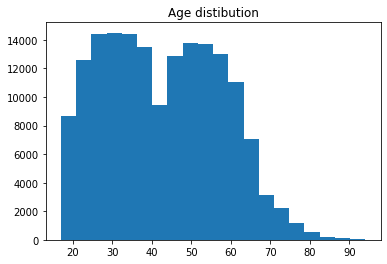

In [11]:
import matplotlib.pyplot as plt

plt.hist(features['AGEP'], bins=20)
plt.title("Age distibution");

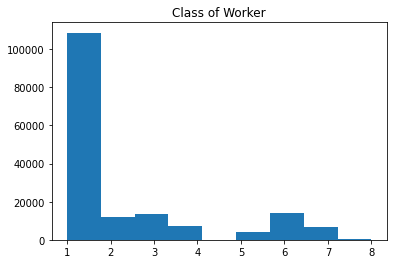

In [12]:
plt.hist(features['COW'], bins=9)
plt.title("Class of Worker");

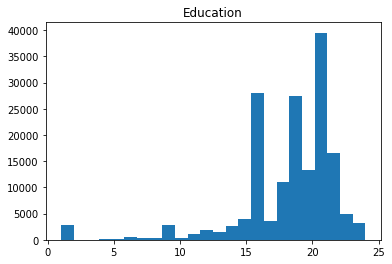

In [13]:
plt.hist(features['SCHL'], bins=24)
plt.title("Education");

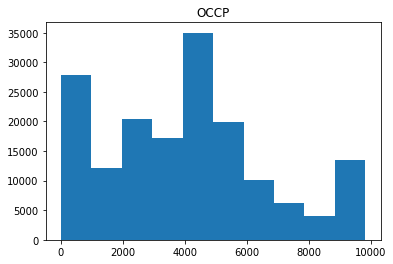

In [14]:
plt.hist(features['OCCP'])
plt.title("OCCP");

## Split train & test sets

In [15]:
import sklearn
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.2,
    shuffle=True
)

In [17]:
print(f"X_train length: {len(X_train)}")
print(f"X_test length: {len(X_test)}")
print(f"y_train length: {len(y_train)}")
print(f"y_test length: {len(y_test)}")

X_train length: 133052
X_test length: 33263
y_train length: 133052
y_test length: 33263


## Data preparation

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.to_numpy())
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns)

X_test_scaled = scaler.transform(X_test.to_numpy())
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns)

## Save Scaler

In [5]:
import joblib

#joblib.dump(scaler, 'scaler.joblib')

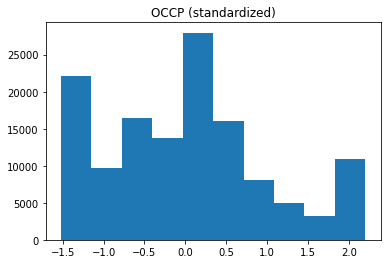

In [20]:
plt.hist(X_train_scaled['OCCP'])
plt.title("OCCP (standardized)");

## Recherche de bons modèles

In [4]:
from sklearn.ensemble import RandomForestClassifier, \
                             AdaBoostClassifier, \
                             GradientBoostingClassifier, \
                             StackingClassifier
                             
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score

## Random Forest (default)

In [22]:
random_forest_default = RandomForestClassifier()
random_forest_default.fit(X_train_scaled, y_train)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [23]:
val_scores = cross_val_score(random_forest_default, X_test_scaled, y_test, cv=5)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474:

In [3]:
import numpy as np

In [25]:
print(val_scores)
np.mean(val_scores)

[0.82038178 0.80610251 0.81917932 0.80862898 0.81509321]


0.8138771598433433

In [26]:
y_pred = random_forest_default.predict(X_test_scaled)

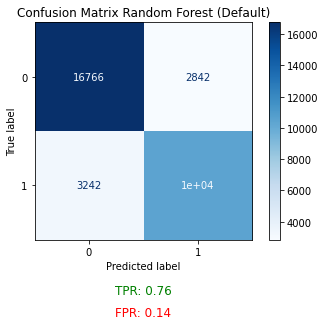

In [32]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.text(0.5,2,f"TPR: {TPR:.2f}", ha='center', fontsize=12, color='green')
plt.text(0.5,2.2,f"FPR: {FPR:.2f}", ha='center', fontsize=12, color='red')
plt.title("Confusion Matrix Random Forest (Default)")
plt.show()

## AdaBoost (default)

In [33]:
adaboost_default = AdaBoostClassifier()
adaboost_default.fit(X_train_scaled, y_train)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [34]:
val_scores = cross_val_score(adaboost_default, X_test_scaled, y_test, cv=5)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: Futu

In [35]:
print(val_scores)
np.mean(val_scores)

[0.81376822 0.81046145 0.80715467 0.80712568 0.81088394]


0.8098787918118493

In [36]:
y_pred = adaboost_default.predict(X_test_scaled)

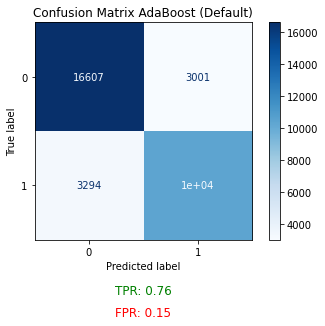

In [38]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.text(0.5,2,f"TPR: {TPR:.2f}", ha='center', fontsize=12, color='green')
plt.text(0.5,2.2,f"FPR: {FPR:.2f}", ha='center', fontsize=12, color='red')
plt.title("Confusion Matrix AdaBoost (Default)")
plt.show()

## Gradient Boosting (default)

In [39]:
gradient_boosting_default = GradientBoostingClassifier()
gradient_boosting_default.fit(X_train_scaled, y_train)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [40]:
val_scores = cross_val_score(gradient_boosting_default, X_test_scaled, y_test, cv=5)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocess

In [41]:
print(val_scores)
np.mean(val_scores)

[0.82368856 0.81587254 0.8169247  0.81178593 0.81614552]


0.8168834490139542

In [42]:
y_pred = gradient_boosting_default.predict(X_test_scaled)

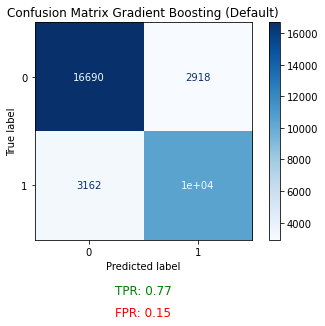

In [43]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.text(0.5,2,f"TPR: {TPR:.2f}", ha='center', fontsize=12, color='green')
plt.text(0.5,2.2,f"FPR: {FPR:.2f}", ha='center', fontsize=12, color='red')
plt.title("Confusion Matrix Gradient Boosting (Default)")
plt.show()

## Stacking (default)

In [44]:
stacking_default = StackingClassifier(estimators=[("forest", random_forest_default),
                                                  ("ada", adaboost_default),
                                                  ("gradient", gradient_boosting_default)])
stacking_default.fit(X_train_scaled, y_train)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemb

StackingClassifier(estimators=[('forest', RandomForestClassifier()),
                               ('ada', AdaBoostClassifier()),
                               ('gradient', GradientBoostingClassifier())])

In [45]:
val_scores = cross_val_score(stacking_default, X_test_scaled, y_test, cv=5)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemb

In [46]:
print(val_scores)
np.mean(val_scores)


[0.82428979 0.81857809 0.82083271 0.81449188 0.81659651]


0.8189577961339086

In [47]:
y_pred = stacking_default.predict(X_test_scaled)

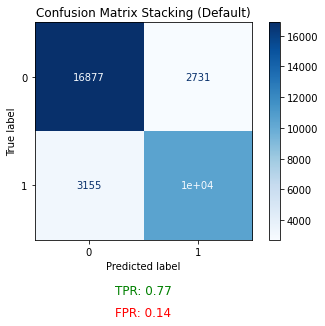

In [48]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.text(0.5,2,f"TPR: {TPR:.2f}", ha='center', fontsize=12, color='green')
plt.text(0.5,2.2,f"FPR: {FPR:.2f}", ha='center', fontsize=12, color='red')
plt.title("Confusion Matrix Stacking (Default)")
plt.show()

***faire tableau accuracy / tp / fp / tn / fn /f1 score etc***

# Grid Search

In [2]:
from sklearn.model_selection import GridSearchCV

## Random Forest

In [50]:
random_forest_parameters = {
    "n_estimators": (10, 100),
    "max_depth": (None, 10, 20),
}

In [51]:
random_forest = RandomForestClassifier()
random_forest_best = GridSearchCV(random_forest, random_forest_parameters)

In [19]:
random_forest_best = RandomForestClassifier(100,max_depth=10)
random_forest_best.fit(X_train_scaled, y_train)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10)

In [21]:
val_scores_random_forest_best = cross_val_score(random_forest_best, X_test_scaled, y_test, cv=5)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474:

In [23]:
print(val_scores_random_forest_best)
print(np.mean(val_scores_random_forest_best))
print(random_forest_best)

[0.81527131 0.81947993 0.81091237 0.81253758 0.81524354]
0.8146889457723873
RandomForestClassifier(max_depth=10)


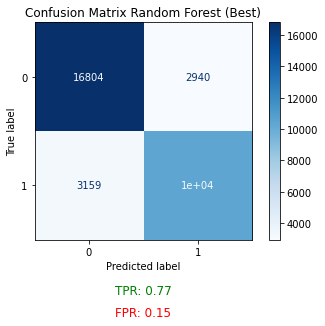

In [24]:
y_pred = random_forest_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.text(0.5,2,f"TPR: {TPR:.2f}", ha='center', fontsize=12, color='green')
plt.text(0.5,2.2,f"FPR: {FPR:.2f}", ha='center', fontsize=12, color='red')
plt.title("Confusion Matrix Random Forest (Best)")
plt.show()

In [26]:
joblib.dump(random_forest_best,
            "RandomForest_BestModel_8146.joblib")

['RandomForest_BestModel_xxxx.joblib']

## AdaBoost

In [57]:
adaboost_parameters = {
    "n_estimators": (50, 100, 500),
    "learning_rate": (0.5, 1.),
}

In [58]:
adaboostClassifier = AdaBoostClassifier()
adaboost_best = GridSearchCV(adaboostClassifier, adaboost_parameters)

In [60]:
adaboost_best.fit(X_train_scaled, y_train)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: Futu

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': (0.5, 1.0),
                         'n_estimators': (50, 100, 500)})

In [61]:
val_scores_adabest = cross_val_score(adaboost_best.best_estimator_, X_test_scaled, y_test, cv=5)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: Futu

In [62]:
print(val_scores_adabest)
print(np.mean(val_scores_adabest))
print(adaboost_best.best_params_)

[0.82353825 0.81902901 0.81947993 0.80847865 0.82035478]
0.8181761260614326
{'learning_rate': 1.0, 'n_estimators': 500}


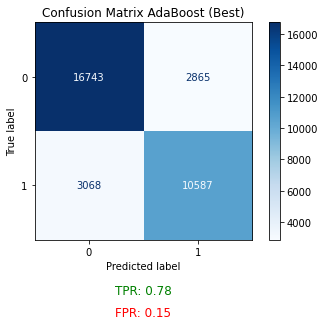

In [63]:
y_pred = adaboost_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.text(0.5,2,f"TPR: {TPR:.2f}", ha='center', fontsize=12, color='green')
plt.text(0.5,2.2,f"FPR: {FPR:.2f}", ha='center', fontsize=12, color='red')
plt.title("Confusion Matrix AdaBoost (Best)")
plt.show()

In [64]:
joblib.dump(adaboost_best.best_estimator_,
            "AdaBoost_BestModel_xxxx.joblib")

['AdaBoost_BestModel_xxxx.joblib']

## Gradient Boosting

In [65]:
gradient_boosting_parameters = {
    "loss": ("log_loss", "exponential"),
    "learning_rate": (0.1, 0.5),
    "n_estimators": (50, 100),
    "max_depth": (2, 3, 5)
}

In [66]:
gradientBoostingClassifier = GradientBoostingClassifier()
gradientboost_best = GridSearchCV(gradientBoostingClassifier, gradient_boosting_parameters)

In [67]:
gradientboost_best.fit(X_train_scaled, y_train)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocess

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': (0.1, 0.5),
                         'loss': ('log_loss', 'exponential'),
                         'max_depth': (2, 3, 5), 'n_estimators': (50, 100)})

In [68]:
val_scores_gradientbest = cross_val_score(gradientboost_best.best_estimator_, X_test_scaled, y_test, cv=5)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocess

In [69]:
print(val_scores)
print(np.mean(val_scores))
print(gradientboost_best.best_params_)

[0.82428979 0.81857809 0.82083271 0.81449188 0.81659651]
0.8189577961339086
{'learning_rate': 0.5, 'loss': 'log_loss', 'max_depth': 3, 'n_estimators': 100}


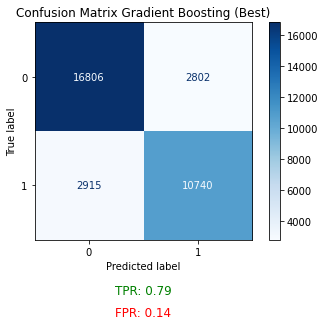

In [70]:
y_pred = gradientboost_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.text(0.5,2,f"TPR: {TPR:.2f}", ha='center', fontsize=12, color='green')
plt.text(0.5,2.2,f"FPR: {FPR:.2f}", ha='center', fontsize=12, color='red')
plt.title("Confusion Matrix Gradient Boosting (Best)")
plt.show()

In [3]:
joblib.dump(gradientboost_best.best_estimator_,
            "GradientBoost_BestModel_xxxx.joblib")

NameError: name 'gradientboost_best' is not defined

## Stacking of best models

In [28]:
ada = joblib.load("AdaBoost_BestModel_8181.joblib")
gb = joblib.load("GradientBoost_BestModel_8189.joblib")
stacking_best = StackingClassifier(estimators=[("forest", random_forest_best),
                                                  ("ada", ada),
                                                  ("gradient", gb)])
stacking_best.fit(X_train_scaled, y_train)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemb

StackingClassifier(estimators=[('forest', RandomForestClassifier(max_depth=10)),
                               ('ada', AdaBoostClassifier(n_estimators=500)),
                               ('gradient',
                                GradientBoostingClassifier(learning_rate=0.5))])

In [29]:
val_scores_stacking_best = cross_val_score(stacking_best, X_test_scaled, y_test, cv=5)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemb

In [30]:
print(val_scores_stacking_best)
np.mean(val_scores_stacking_best)

[0.82083271 0.82474072 0.81947993 0.82005412 0.82005412]


0.821032319502123

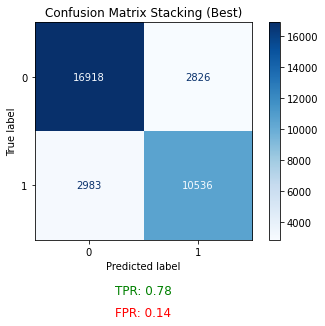

In [31]:
y_pred = stacking_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.text(0.5,2,f"TPR: {TPR:.2f}", ha='center', fontsize=12, color='green')
plt.text(0.5,2.2,f"FPR: {FPR:.2f}", ha='center', fontsize=12, color='red')
plt.title("Confusion Matrix Stacking (Best)")
plt.show()

In [33]:
joblib.dump(stacking_best,
            "Stacking_BestModel_8210.joblib")

['Stacking_BestModel_8210.joblib']

Nevada and Colorado

In [83]:
import warnings

# Désactiver les warnings
warnings.filterwarnings("ignore")
features_nevada = scaler.transform(pd.read_csv('acsincome_ne_features.csv'))
labels_nevada = pd.read_csv('acsincome_ne_labelTP2.csv').values.ravel()

features_colorado = scaler.transform(pd.read_csv('acsincome_co_features.csv'))
labels_colorado = pd.read_csv('acsincome_co_label.csv').values.ravel()

datasets = {
        "Nevada": (features_nevada, labels_nevada),
        "Colorado": (features_colorado, labels_colorado)
    }
models = [random_forest_best.best_estimator_, adaboost_best.best_estimator_, gradientboost_best.best_estimator_, stacking_best]

for model in models:
        print(f"Testing model: {model}")
        for dataset_name, (features, labels) in datasets.items():
            print(f"Validating on {dataset_name}...")
            
            # Prédire sur les données fournies
            y_pred = model.predict(features)
            
            # Calculer et afficher les métriques
            accuracy = np.mean(y_pred == labels)
            print(f"{dataset_name} accuracy for {model}: {accuracy:.2f}")


Testing model: RandomForestClassifier(max_depth=20)
Validating on Nevada...
Nevada accuracy for RandomForestClassifier(max_depth=20): 0.74
Validating on Colorado...
Colorado accuracy for RandomForestClassifier(max_depth=20): 0.78
Testing model: AdaBoostClassifier(n_estimators=500)
Validating on Nevada...
Nevada accuracy for AdaBoostClassifier(n_estimators=500): 0.74
Validating on Colorado...
Colorado accuracy for AdaBoostClassifier(n_estimators=500): 0.78
Testing model: GradientBoostingClassifier(learning_rate=0.5)
Validating on Nevada...
Nevada accuracy for GradientBoostingClassifier(learning_rate=0.5): 0.75
Validating on Colorado...
Colorado accuracy for GradientBoostingClassifier(learning_rate=0.5): 0.79
Testing model: StackingClassifier(estimators=[('forest', RandomForestClassifier(max_depth=20)),
                               ('ada', AdaBoostClassifier(n_estimators=500)),
                               ('gradient',
                                GradientBoostingClassifier(learni

## 4. Interprétabilité et Équité

In [31]:
labels

,PINCP
0,True
1,True
2,False
3,True
4,False
...,...
166310,False
166311,True
166312,True
166313,True


In [37]:
from sklearn.feature_selection import r_regression

correlation_initiale = r_regression(features, labels)

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
def plot_correlation(features, labels, title):
    correlation = r_regression(features, labels)
    norm = plt.Normalize(min(correlation), max(correlation))
    cmap = plt.cm.cividis
    colors = cmap(norm(correlation))

    plt.barh(features.columns, correlation, color=colors)
    plt.axvline(0, color='black', linewidth=1)
    plt.ylabel("Features")
    plt.xlabel("Labels")
    plt.title(title);

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


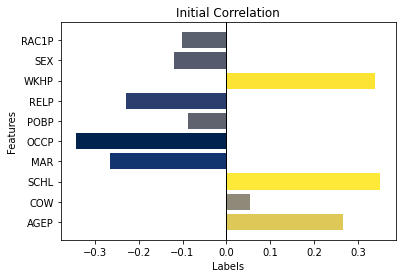

In [38]:
plot_correlation(features, labels, "Initial Correlation")

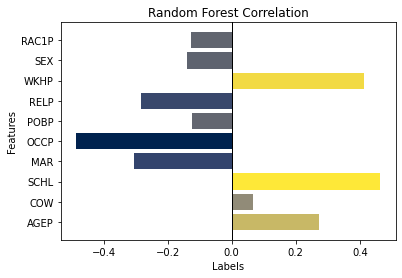

In [39]:
rand = joblib.load("RandomForest_BestModel_8146.joblib")
y_pred_random_forest_default = rand.predict(X_test_scaled)
plot_correlation(X_test_scaled, y_pred_random_forest_default, "Random Forest Correlation")

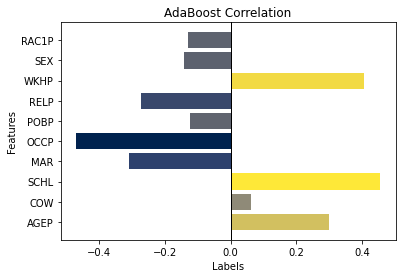

In [40]:
ada = joblib.load("AdaBoost_BestModel_8181.joblib")
y_pred_adaboost_default = ada.predict(X_test_scaled)
plot_correlation(X_test_scaled, y_pred_adaboost_default, "AdaBoost Correlation")

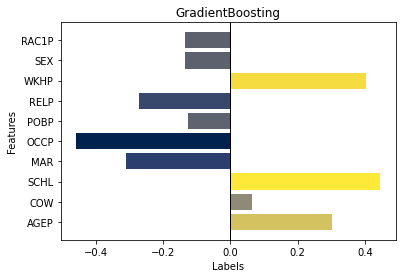

In [41]:
gb = joblib.load("GradientBoost_BestModel_8189.joblib")
y_pred_gradient_boosting_default = gb.predict(X_test_scaled)
plot_correlation(X_test_scaled, y_pred_gradient_boosting_default, "GradientBoosting")

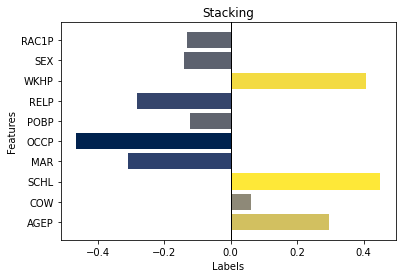

In [42]:
st = joblib.load("Stacking_BestModel_8210.joblib")
y_pred_stacking_default = st.predict(X_test_scaled)
plot_correlation(X_test_scaled, y_pred_stacking_default, "Stacking")

In [43]:
from sklearn.inspection import permutation_importance

In [18]:
results_random_forest_default = permutation_importance(
    random_forest_best.best_estimator_,
    X_test_scaled,
    y_pred_random_forest_default
)

NameError: name 'permutation_importance' is not defined

In [113]:
results_random_adaboost_default = permutation_importance(
    adaboost_best.best_estimator_,
    X_test_scaled,
    y_pred_adaboost_default
)

In [114]:
results_gradient_boosting_default = permutation_importance(
    gradientboost_best.best_estimator_,
    X_test_scaled,
    y_pred_gradient_boosting_default
)

In [115]:
results_stacking_default = permutation_importance(
    stacking_best,
    X_test_scaled,
    y_pred_stacking_default
)

In [116]:
def plot_importance(results, features, title):
    plt.barh(features.columns, results['importances_mean'], color='orange')
    plt.ylabel("Features")
    plt.xlabel("Importance")
    plt.title(title);

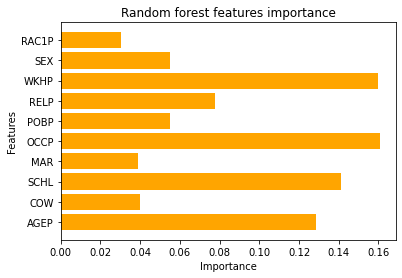

In [117]:
plot_importance(results_random_forest_default,
                X_test_scaled,
                "Random forest features importance")

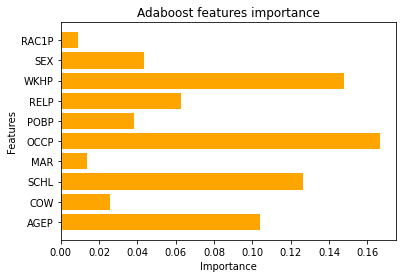

In [118]:
plot_importance(results_random_adaboost_default,
                X_test_scaled,
                "Adaboost features importance")

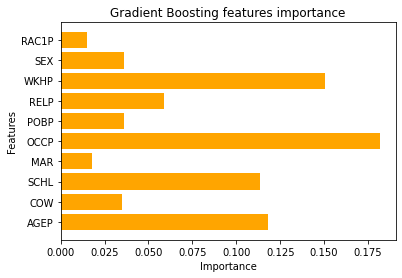

In [119]:
plot_importance(results_gradient_boosting_default,
                X_test_scaled,
                "Gradient Boosting features importance")

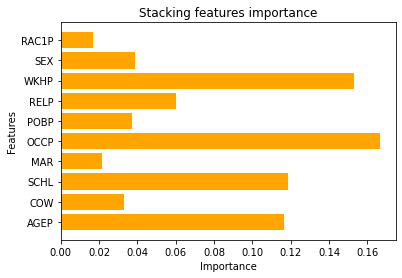

In [120]:
plot_importance(results_stacking_default,
                X_test_scaled,
                "Stacking features importance")

## Équité

In [44]:
def print_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    print(f"Positive predictions rate: {(fp + tp) / (tn + fp + fn + tp):.2f}")
    print(f"True positive rate: {tp / (fn + tp):.2f}")
    print(f"False positive rate: {fp / (fp + tn):.2f}")

In [45]:
print(f"total samples: {len(y_train)}")
print(f"> 50,000: {len(y_train[y_train['PINCP'] == 1])}")
print(f"Rate: {len(y_train[y_train['PINCP'] == 1]) * 100 / len(y_train):.2f}%")

total samples: 133052
> 50,000: 54684
Rate: 41.10%


In [46]:
train_set = X_train.join(y_train)
train_set

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
34715,57.0,1.0,19.0,1.0,9130.0,6.0,1.0,30.0,1.0,1.0,False
155616,53.0,4.0,14.0,4.0,6730.0,313.0,0.0,40.0,1.0,8.0,False
114618,33.0,1.0,9.0,1.0,4000.0,303.0,15.0,40.0,1.0,8.0,False
87267,55.0,1.0,22.0,1.0,440.0,119.0,0.0,40.0,1.0,1.0,True
84804,69.0,1.0,21.0,1.0,4700.0,26.0,0.0,16.0,1.0,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...
120324,20.0,1.0,19.0,5.0,5610.0,6.0,2.0,4.0,1.0,1.0,False
93007,29.0,5.0,22.0,1.0,3945.0,207.0,1.0,40.0,1.0,6.0,False
89195,39.0,1.0,16.0,1.0,7610.0,158.0,0.0,40.0,1.0,1.0,False
65505,39.0,4.0,1.0,3.0,3802.0,6.0,0.0,40.0,1.0,1.0,True


In [47]:
print(f"Rate of males with income > $50000: {len(train_set[(train_set['SEX'] == 1) & (train_set['PINCP'] == True)]) * 100 / len(train_set[train_set['SEX'] == 1]):.2f}%")

Rate of males with income > $50000: 46.65%


In [48]:
print(f"Rate of females with income > $50000: {len(train_set[(train_set['SEX'] == 2) & (train_set['PINCP'] == True)]) * 100 / len(train_set[train_set['SEX'] == 2]):.2f}%")

Rate of females with income > $50000: 34.91%


In [49]:
test_set = X_test.join(y_test)

### Random forest

In [50]:
rf_test_set = X_test.copy(deep=True)
rf_test_set['PINCP'] = y_pred_random_forest_default

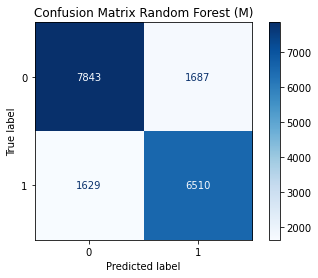

Positive predictions rate: 0.46
True positive rate: 0.80
False positive rate: 0.18


In [51]:
# Males
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 1, ['PINCP']], rf_test_set.loc[rf_test_set['SEX'] == 1, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Random Forest (M)")
plt.show()
print_metrics(cm)

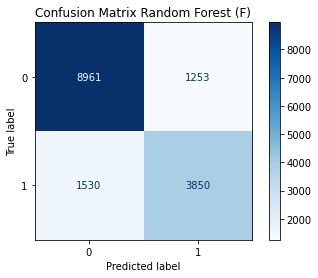

Positive predictions rate: 0.33
True positive rate: 0.72
False positive rate: 0.12


In [52]:
# Females
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 2, ['PINCP']], rf_test_set.loc[rf_test_set['SEX'] == 2, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Random Forest (F)")
plt.show()
print_metrics(cm)

### Adaboost

In [53]:
ab_test_set = X_test.copy(deep=True)
ab_test_set['PINCP'] = y_pred_adaboost_default

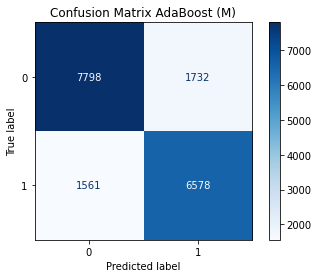

Positive predictions rate: 0.47
True positive rate: 0.81
False positive rate: 0.18


In [54]:
# Males
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 1, ['PINCP']], ab_test_set.loc[ab_test_set['SEX'] == 1, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix AdaBoost (M)")
plt.show()
print_metrics(cm)

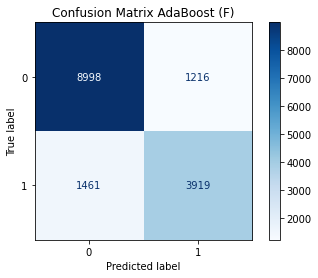

Positive predictions rate: 0.33
True positive rate: 0.73
False positive rate: 0.12


In [55]:
# Females
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 2, ['PINCP']], ab_test_set.loc[ab_test_set['SEX'] == 2, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix AdaBoost (F)")
plt.show()
print_metrics(cm)

### GradientBoosting

In [56]:
gb_test_set = X_test.copy(deep=True)
gb_test_set['PINCP'] = y_pred_gradient_boosting_default

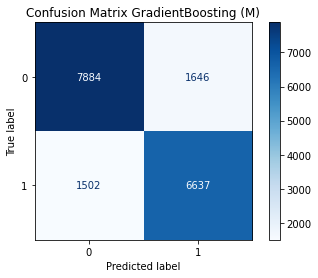

Positive predictions rate: 0.47
True positive rate: 0.82
False positive rate: 0.17


In [57]:
# Males
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 1, ['PINCP']], gb_test_set.loc[gb_test_set['SEX'] == 1, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix GradientBoosting (M)")
plt.show()
print_metrics(cm)

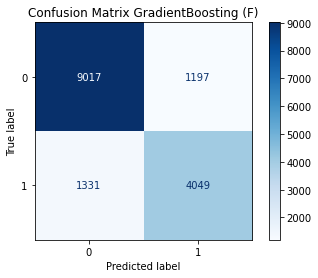

Positive predictions rate: 0.34
True positive rate: 0.75
False positive rate: 0.12


In [58]:
# Females
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 2, ['PINCP']], gb_test_set.loc[gb_test_set['SEX'] == 2, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix GradientBoosting (F)")
plt.show()
print_metrics(cm)

### Stacking

In [59]:
st_test_set = X_test.copy(deep=True)
st_test_set['PINCP'] = y_pred_stacking_default

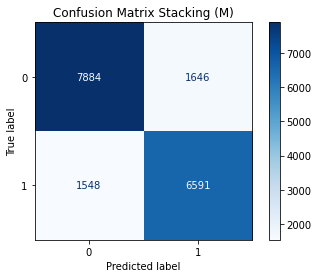

Positive predictions rate: 0.47
True positive rate: 0.81
False positive rate: 0.17


In [60]:
# Males
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 1, ['PINCP']], st_test_set.loc[st_test_set['SEX'] == 1, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Stacking (M)")
plt.show()
print_metrics(cm)

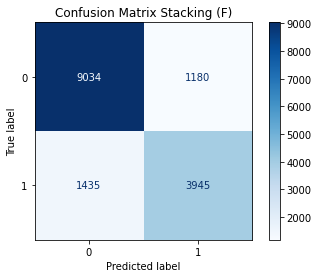

Positive predictions rate: 0.33
True positive rate: 0.73
False positive rate: 0.12


In [61]:
# Females
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 2, ['PINCP']], st_test_set.loc[st_test_set['SEX'] == 2, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Stacking (F)")
plt.show()
print_metrics(cm)

Random forest without gender

c:\Users\Taralhan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


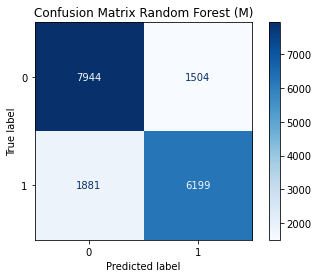

Positive predictions rate: 0.44
True positive rate: 0.77
False positive rate: 0.16


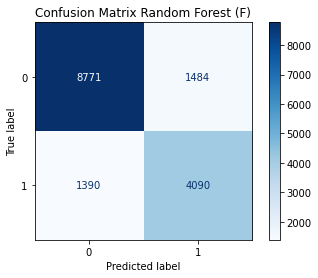

Positive predictions rate: 0.35
True positive rate: 0.75
False positive rate: 0.14


In [89]:
X_train_scaled_wo_gender = X_train_scaled.drop(columns=['SEX'])
X_test_scaled_wo_gender = X_test_scaled.drop(columns=['SEX'])

model = RandomForestClassifier()
model.fit(X_train_scaled_wo_gender,y_train)

y_pred_no_gender = model.predict(X_test_scaled_wo_gender)
rf_test_set = X_test.copy(deep=True)
rf_test_set['PINCP'] = y_pred_no_gender

# Males
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 1, ['PINCP']], rf_test_set.loc[rf_test_set['SEX'] == 1, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Random Forest (M)")
plt.show()
print_metrics(cm)
# Females
cm = confusion_matrix(test_set.loc[test_set['SEX'] == 2, ['PINCP']], rf_test_set.loc[rf_test_set['SEX'] == 2, ['PINCP']])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Random Forest (F)")
plt.show()
print_metrics(cm)



In [32]:
import joblib
joblib.dump(rand,"RandomForest_BestModel_8146.joblib",compress=5)
joblib.dump(ada,"AdaBoost_BestModel_8181.joblib",compress=3)
joblib.dump(gb,"GradientBoost_BestModel_8189.joblib",compress=3)
joblib.dump(st,"Stacking_BestModel_8210.joblib",compress=5)

['Stacking_BestModel_8246.joblib']